In [17]:
# ------------------
# Step 1: Load and Clean Data
# ------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the raw data USING THE CORRECT PATH
df = pd.read_csv('../data/raw/hour.csv')
# Perform the same cleaning steps as before
# 1. Convert 'dteday' to datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# 2. Drop redundant columns
# We will keep 'mnth' and drop 'season' due to high correlation
columns_to_drop = ['instant', 'dteday', 'season', 'atemp', 'casual', 'registered']
df_model = df.drop(columns=columns_to_drop)

print("Data loaded and cleaned for modeling.")
print(f"Shape of the modeling dataframe: {df_model.shape}")
display(df_model.head())

Data loaded and cleaned for modeling.
Shape of the modeling dataframe: (17379, 11)


,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,0,1,0,0,6,0,1,0.24,0.81,0.0,16
1,0,1,1,0,6,0,1,0.22,0.80,0.0,40
2,0,1,2,0,6,0,1,0.22,0.80,0.0,32
3,0,1,3,0,6,0,1,0.24,0.75,0.0,13
4,0,1,4,0,6,0,1,0.24,0.75,0.0,1


In [18]:
# ------------------
# Step 2: Separate Features (X) and Target (y)
# ------------------
X = df_model.drop('cnt', axis=1) # All columns except 'cnt'
y = df_model['cnt']              # Only the 'cnt' column

print("Features (X):")
display(X.head())
print("\nTarget (y):")
display(y.head())

Features (X):


,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed
0,0,1,0,0,6,0,1,0.24,0.81,0.0
1,0,1,1,0,6,0,1,0.22,0.80,0.0
2,0,1,2,0,6,0,1,0.22,0.80,0.0
3,0,1,3,0,6,0,1,0.24,0.75,0.0
4,0,1,4,0,6,0,1,0.24,0.75,0.0



Target (y):


0    16
1    40
2    32
3    13
4     1
Name: cnt, dtype: int64

In [19]:
# ------------------
# Step 3: Split Data into Training and Testing Sets
# ------------------
from sklearn.model_selection import train_test_split

# Split the data, with 80% for training and 20% for testing
# random_state=42 ensures that we get the same split every time we run the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (13903, 10)
Testing set shape: (3476, 10)


In [20]:
# ------------------
# Step 4: Train our First Model - Linear Regression
# ------------------
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Create the model instance
lr_model = LinearRegression()

# 2. Train the model on the training data
print("Training the Linear Regression model...")
lr_model.fit(X_train, y_train)
print("Model trained successfully!")

# 3. Make predictions on the TEST set
y_pred_lr = lr_model.predict(X_test)

# 4. Evaluate the model's performance
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"\n--- Linear Regression Performance ---")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"R-squared (R2 Score): {r2_lr:.2f}")

Training the Linear Regression model...
Model trained successfully!

--- Linear Regression Performance ---
Mean Squared Error (MSE): 19554.52
R-squared (R2 Score): 0.38


In [21]:
# ------------------
# Step 5: Train a More Powerful Model - Random Forest
# ------------------
from sklearn.ensemble import RandomForestRegressor

# 1. Create the model instance
# n_estimators=100 means it will build 100 "decision trees"
# random_state=42 for reproducibility
# n_jobs=-1 uses all available CPU cores to speed up training
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# 2. Train the model on the same training data
print("Training the Random Forest model... (This may take a moment)")
rf_model.fit(X_train, y_train)
print("Model trained successfully!")

# 3. Make predictions on the TEST set
y_pred_rf = rf_model.predict(X_test)

# 4. Evaluate the new model's performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\n--- Random Forest Performance ---")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R-squared (R2 Score): {r2_rf:.2f}")

print("\n--- Comparison ---")
print(f"Linear Regression R2: {r2_lr:.2f}")
print(f"Random Forest R2:     {r2_rf:.2f}")

Training the Random Forest model... (This may take a moment)
Model trained successfully!

--- Random Forest Performance ---
Mean Squared Error (MSE): 1852.63
R-squared (R2 Score): 0.94

--- Comparison ---
Linear Regression R2: 0.38
Random Forest R2:     0.94


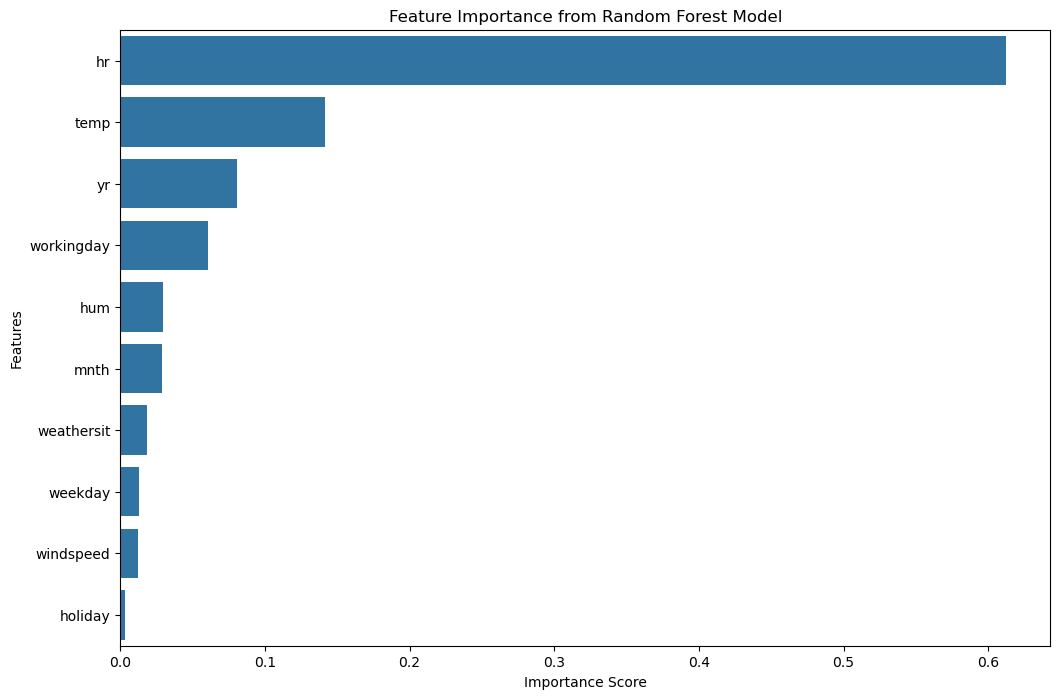

In [ ]:
# ------------------
# Step 6: Understand What the Model Learned - Feature Importance
# ------------------

# Get feature importances from the trained Random Forest model
importances = rf_model.feature_importances_

# Create a pandas Series for easier plotting
feature_importance_df = pd.Series(importances, index=X_train.columns)

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance_df, y=feature_importance_df.index)
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [ ]:
conda activate fleetmind_env


CondaError: Run 'conda init' before 'conda activate'


Note: you may need to restart the kernel to use updated packages.


In [ ]:
conda init zsh

no change     /opt/anaconda3/condabin/conda
no change     /opt/anaconda3/bin/conda
no change     /opt/anaconda3/bin/conda-env
no change     /opt/anaconda3/bin/activate
no change     /opt/anaconda3/bin/deactivate
no change     /opt/anaconda3/etc/profile.d/conda.sh
no change     /opt/anaconda3/etc/fish/conf.d/conda.fish
no change     /opt/anaconda3/shell/condabin/Conda.psm1
modified      /opt/anaconda3/shell/condabin/conda-hook.ps1
no change     /opt/anaconda3/lib/python3.12/site-packages/xontrib/conda.xsh
no change     /opt/anaconda3/etc/profile.d/conda.csh
no change     /Users/fahadahmed/.zshrc

==> For changes to take effect, close and re-open your current shell. <==


Note: you may need to restart the kernel to use updated packages.


In [22]:
conda activate fleetmind_env


CondaError: Run 'conda init' before 'conda activate'


Note: you may need to restart the kernel to use updated packages.


In [23]:
import joblib

# Define the file path for the model
model_filename = '../models/random_forest_demand_model.joblib'

# Save the trained model
joblib.dump(rf_model, model_filename)

print(f"Model saved successfully to: {model_filename}")

Model saved successfully to: ../models/random_forest_demand_model.joblib


In [24]:
import joblib
import os

# --- Step 1: Define the correct path ---
# The models directory is at the root of our project
models_directory = 'models'
model_filename = os.path.join(models_directory, 'random_forest_demand_model.joblib')

# --- Step 2: Create the directory if it doesn't exist (Best Practice) ---
os.makedirs(models_directory, exist_ok=True)

# --- Step 3: Save the trained model ---
joblib.dump(rf_model, model_filename)

print(f"Model saved successfully to: {model_filename}")

Model saved successfully to: models/random_forest_demand_model.joblib


In [25]:
import joblib

# Define the path to save the model
model_path = '../models/random_forest_demand_model.joblib'

# Save the trained model to the file
joblib.dump(rf_model, model_path)

print(f"Model saved successfully to: {model_path}")

Model saved successfully to: ../models/random_forest_demand_model.joblib
